In [2]:
from __future__ import print_function
from statsmodels.compat import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import seaborn as sns
%matplotlib inline

base_df = pd.read_csv('cannabis.csv')
base_df[:10]
from scipy import stats
import matplotlib.pyplot as plt
plt.show()
base_df.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description'], dtype='object')

In [3]:
len(base_df)

2351

In [4]:
#variance is 
base_df['Rating'].var()

0.6995549598631638

In [5]:
#arithmetic mean
base_df['Rating'].mean()

4.310633772862611

In [6]:
more_than_one = base_df['Rating'] > 1

In [7]:
new_df = base_df[more_than_one]
display(new_df)

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...


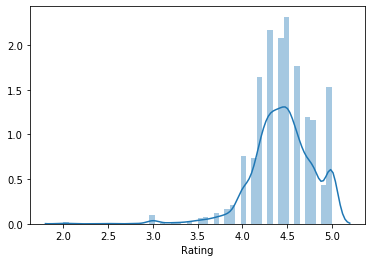

In [8]:
sns.distplot(new_df['Rating'])

In [9]:
len(new_df['Rating'])

2279

In [10]:
# Now lets do math whith these
new_df['Rating'].mean()

4.446379991224221

In [11]:
new_df['Rating'].var()

0.11927464219824399

In [12]:
new_df['Rating'].median()

4.5

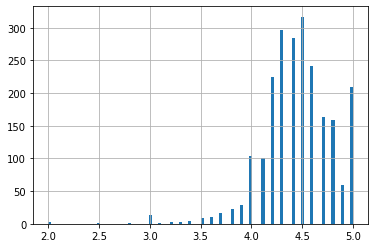

In [13]:
new_df['Rating'].skew()
new_df['Rating'].hist(bins=100)

In [14]:
#weak random sampling without replacement
# 5 samples
import random
from random import choice
import math
rating_list =list(new_df['Rating'])
fifteen_samples_of_150= []
for j in range(15):
    y = np.zeros(150)
    for i in range(150):
       
        position =int(random.randint(0, len(rating_list)-1))
#         print(position)
        y[i]= rating_list[int(position)]
        
        del rating_list[position]
#         print(len(rating_list))
    fifteen_samples_of_150.append(y)
        
# five_samples_of_150

In [15]:
# for sample in fifteen_samples_of_150:
#     print(sample.mean())
#     print(sample.var())
#     print(stats.skew(sample))
#     sns.distplot(sample)
#     plt.show()

In [20]:
unique_flavor_list = []

for description in new_df['Flavor']:
    if type(description) == str:
        for line in description.split(','):
            if line not in unique_flavor_list:
                unique_flavor_list.append(line)
print(unique_flavor_list)

# 50 diffrent_labeles
len(unique_flavor_list)

['Earthy', 'Sweet', 'Citrus', 'Flowery', 'Violet', 'Diesel', 'Spicy/Herbal', 'Sage', 'Woody', 'Apricot', 'Grapefruit', 'Orange', 'Pungent', 'Grape', 'Pine', 'Skunk', 'None', 'Berry', 'Pepper', 'Menthol', 'Blue', 'Cheese', 'Chemical', 'Mango', 'Lemon', 'Peach', 'Vanilla', 'Nutty', 'Chestnut', 'Tea', 'Tobacco', 'Tropical', 'Strawberry', 'Blueberry', 'Mint', 'Apple', 'Honey', 'Lavender', 'Lime', 'Coffee', 'Ammonia', 'Minty', 'Tree', 'Fruit', 'Butter', 'Pineapple', 'Tar', 'Rose', 'Plum', 'Pear']


50

In [21]:
#Get dictionary of counts of each
flavor_count_dict= {key: 0 for key in unique_flavor_list}
flavor_count_dict

for description in new_df['Flavor']:
    if type(description) == str:
        for line in description.split(','):
            flavor_count_dict[line] +=1
            
            
flavor_count_df =pd.DataFrame.from_dict(flavor_count_dict, orient='index',columns=['count'])
print(flavor_count_df['count'].mean())
print(flavor_count_df['count'].median())
print(flavor_count_df['count'].var())
print(stats.skew(flavor_count_df['count']))


130.92
37.5
52344.80979591836
3.0467942716487757


In [23]:
# flavor_count_df

In [24]:
unique_effects_list = []

for description in new_df['Effects']:
    if type(description) == str:
        for line in description.split(','):
            if line not in unique_effects_list:
                unique_effects_list.append(line)
print(unique_effects_list)

# 50 diffrent_labeles
len(unique_effects_list)

['Creative', 'Energetic', 'Tingly', 'Euphoric', 'Relaxed', 'Aroused', 'Happy', 'Uplifted', 'Hungry', 'Talkative', 'Giggly', 'Focused', 'Sleepy', 'None', 'Dry', 'Mouth']


16

In [27]:
#Get dictionary of counts of each
effects_count_dict= {key: 0 for key in unique_effects_list}
effects_count_dict

for description in new_df['Effects']:
    if type(description) == str:
        for line in description.split(','):
            effects_count_dict[line] +=1
            
            
effects_count_df =pd.DataFrame.from_dict(effects_count_dict, orient='index',columns=['count'])
print(effects_count_df['count'].mean())
print(effects_count_df['count'].median())
print(effects_count_df['count'].var())
print(stats.skew(effects_count_df['count']))

695.0
533.5
404001.3333333333
0.7410216709632074


In [28]:
effects_count_df

,count
Creative,743
Energetic,645
Tingly,339
Euphoric,1628
Relaxed,1721
Aroused,196
Happy,1864
Uplifted,1500
Hungry,475
Talkative,358


In [38]:
zeros = np.zeros(len(new_df))
for flavor in unique_flavor_list:
    new_df[flavor] = zeros 
    
for effect in unique_effects_list:
    new_df[effect] = zeros 

/home/novan/anaconda3/envs/420_resarch/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/novan/anaconda3/envs/420_resarch/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
# for row in new_df[:10].iterrows():
#     for flavor in row[1]['Flavor'].split(','):
#         row[1][flavor]= 1
#         new_df.iloc[row[0]][flavor] =1
#     for effect in row[1]['Effects'].split(','):
#         row[1][effect]= 1
#         new_df.iloc[row[0]][effect] =1
# for i in range(len(new_df)):
#     if type(new_df.loc[i]['Flavor']) == str:
#         for flavor in new_df.loc[i]['Flavor'].split(','):
#             print(new_df.loc[i][flavor])
#             new_df.loc[i][flavor] = 1
            
for i in new_df.index:
    row = new_df.loc[i]
    if type(row['Flavor']) == str:
        for flavor in row['Flavor'].split(','):
            new_df.loc[i,flavor] = 1
    if type(row['Effects']) == str:
        for effect in row['Effects'].split(','):
            new_df.loc[i,effect] = 1

In [87]:
new_df.describe()


,Rating,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,...,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth
count,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,...,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000
mean,4.446380,0.718736,0.696358,0.399737,0.215884,0.005704,0.195700,0.180781,0.030715,0.204476,...,0.086003,0.817903,0.658183,0.208425,0.157086,0.129004,0.259763,0.322071,0.000439,0.000439
std,0.345362,0.449715,0.459931,0.489952,0.411525,0.075327,0.396826,0.384921,0.172583,0.403406,...,0.280429,0.386009,0.474423,0.406271,0.363962,0.335278,0.438601,0.467373,0.020947,0.020947
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.700000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Alright lets start looking at binomial data!

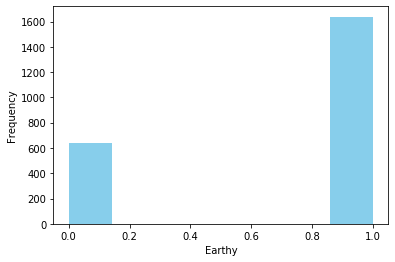

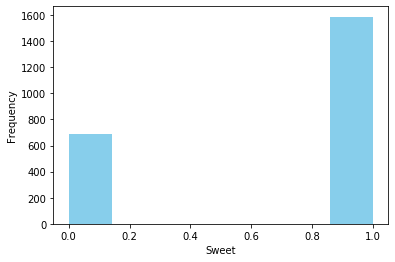

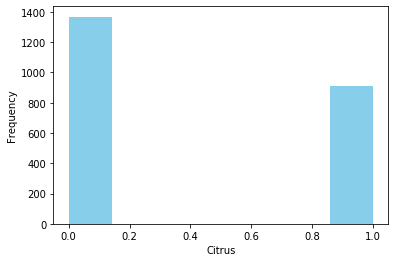

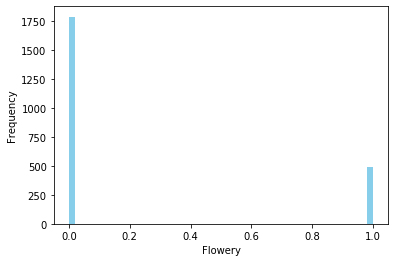

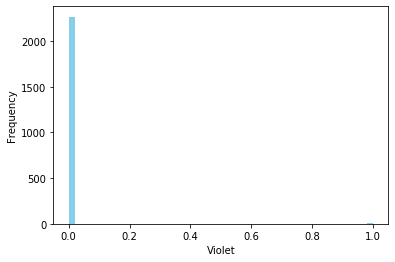

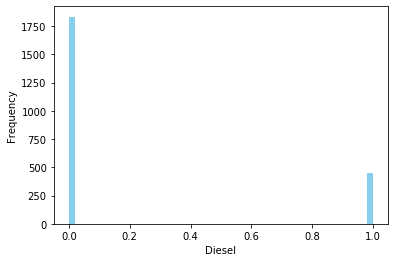

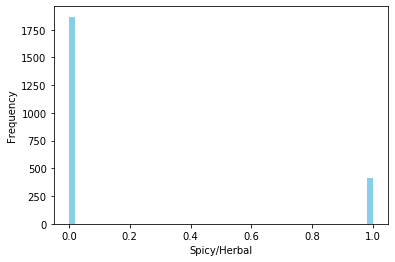

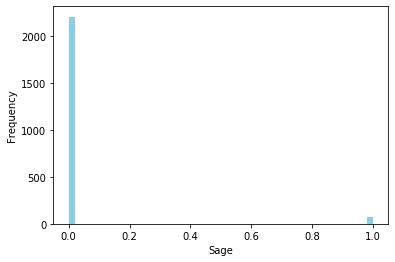

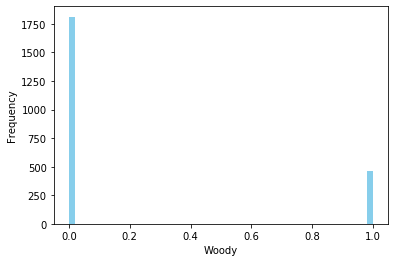

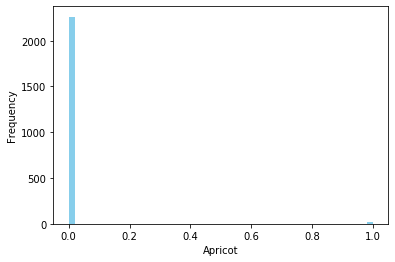

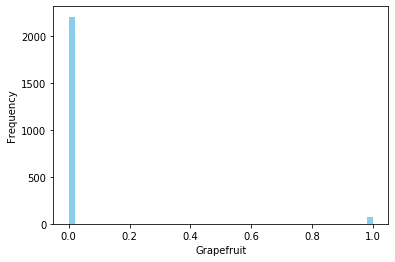

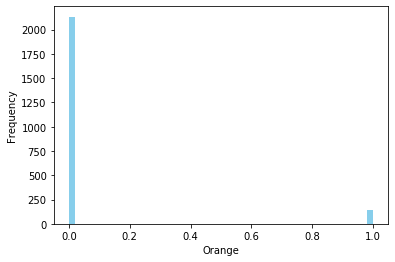

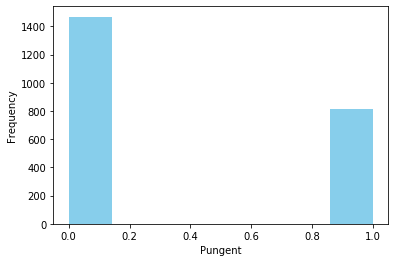

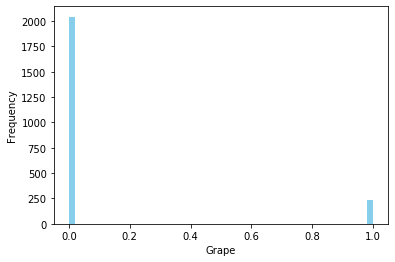

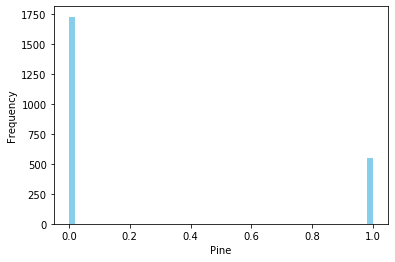

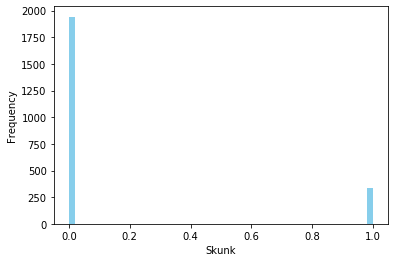

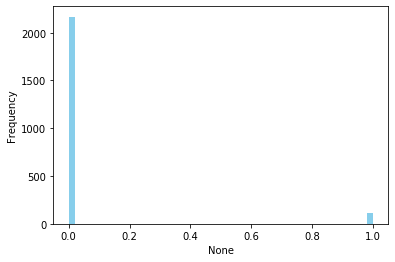

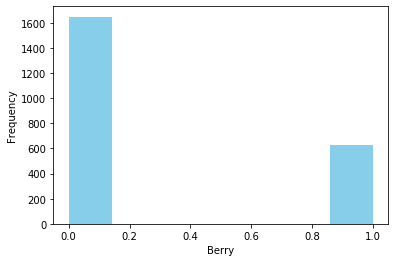

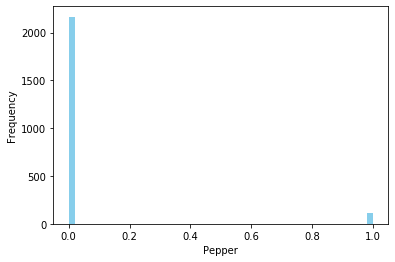

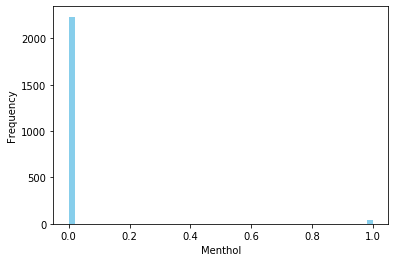

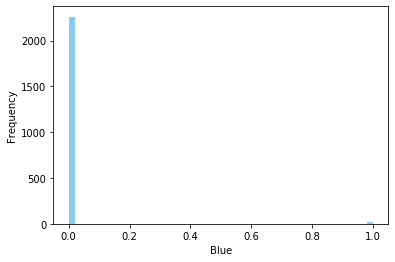

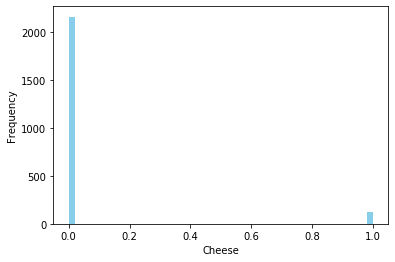

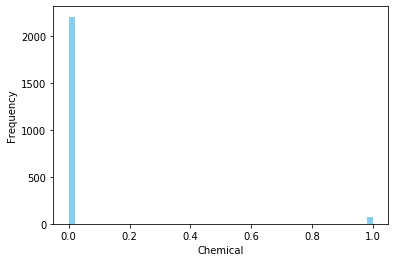

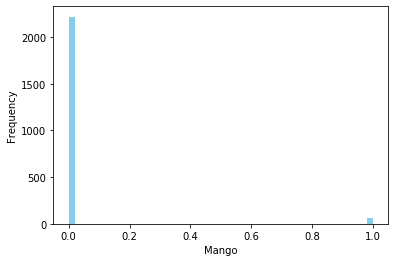

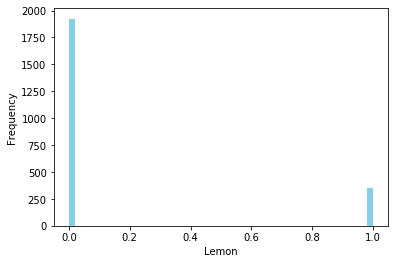

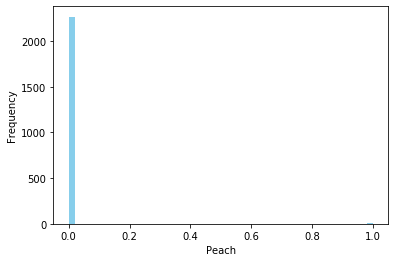

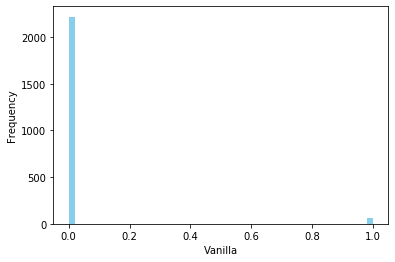

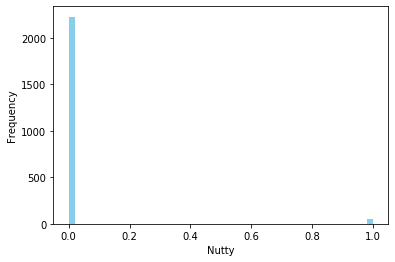

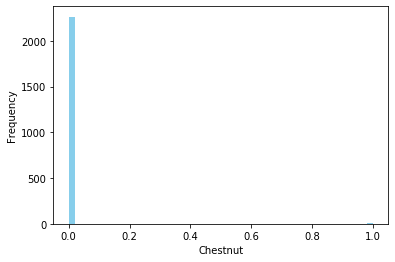

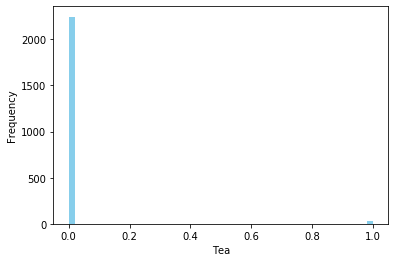

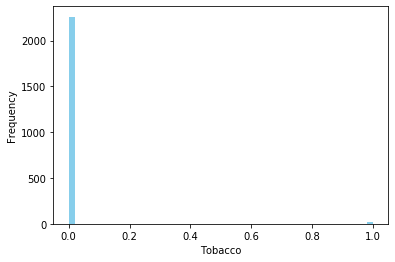

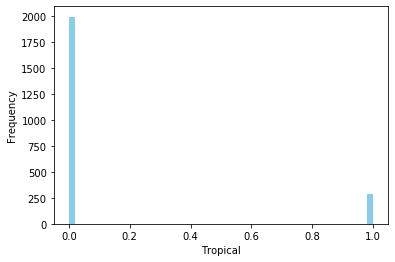

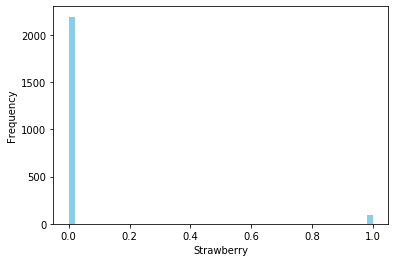

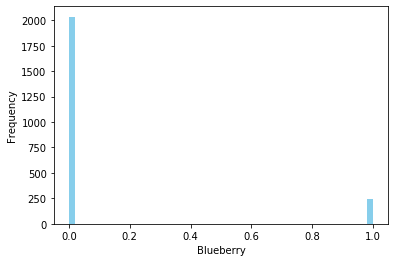

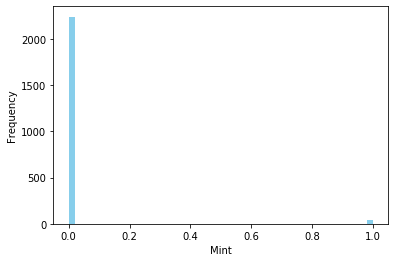

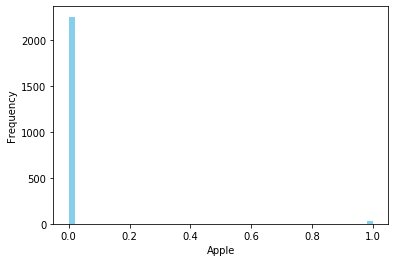

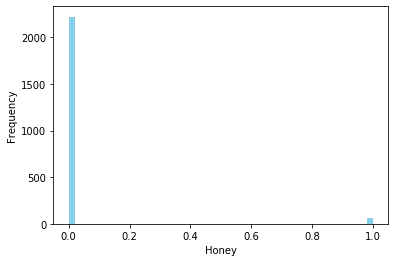

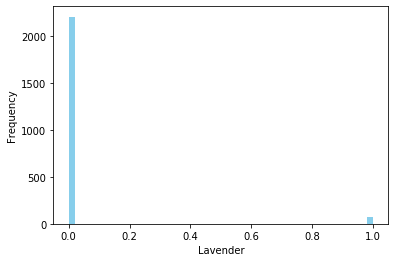

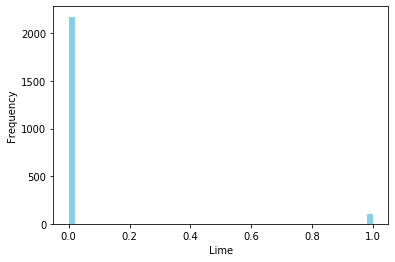

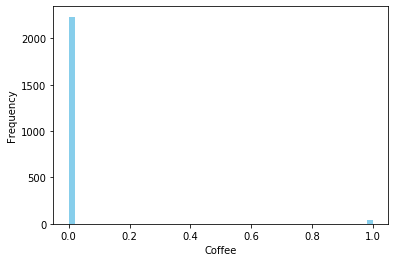

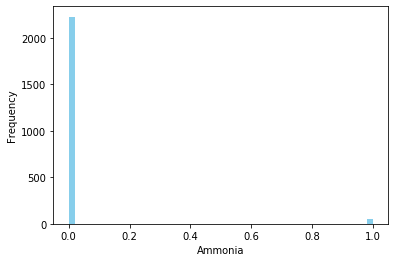

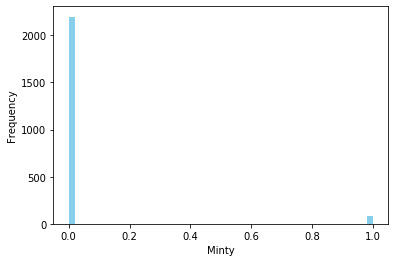

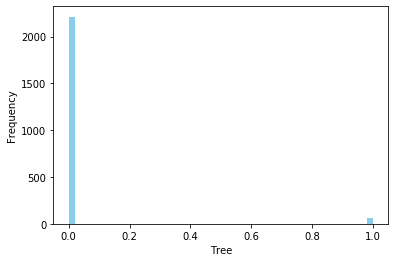

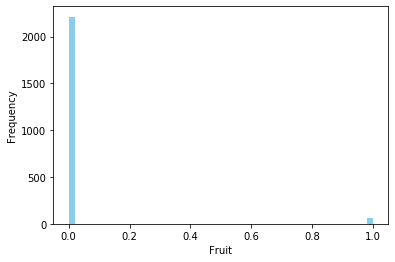

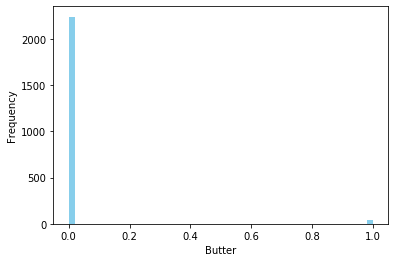

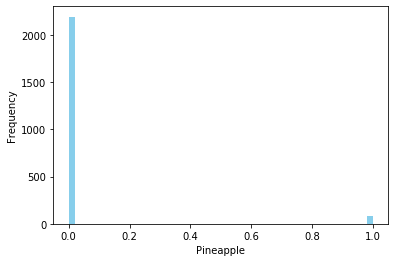

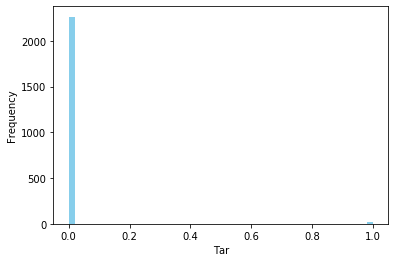

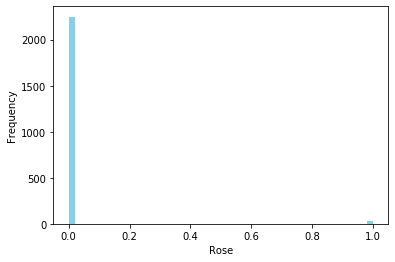

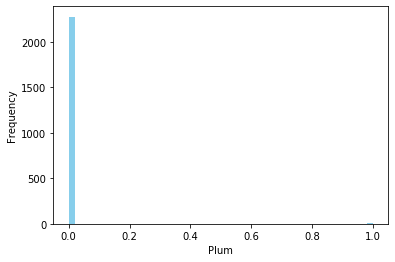

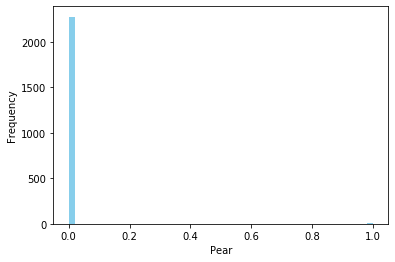

In [85]:
for flavor in unique_flavor_list:
    ax = sns.distplot(new_df[flavor],
                     kde=False,
                     color="skyblue",
                     hist_kws={"linewidth": 15,'alpha':1})
    ax.set(xlabel=flavor, ylabel='Frequency')
    plt.show()

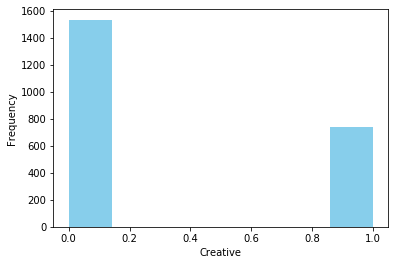

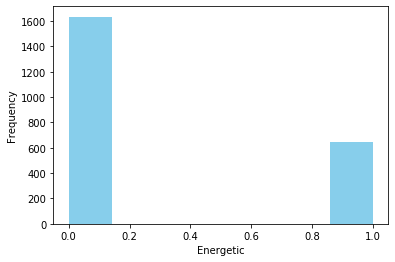

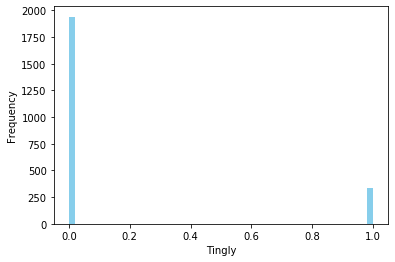

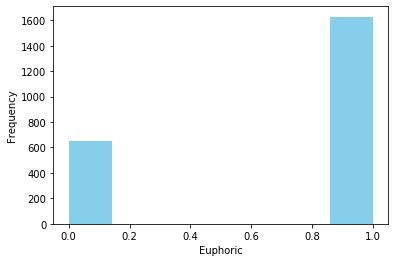

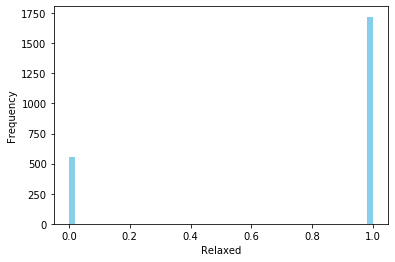

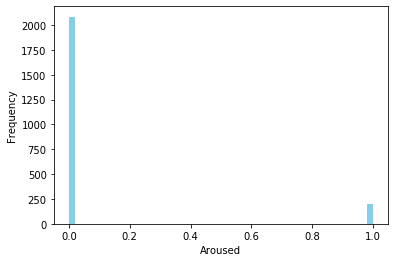

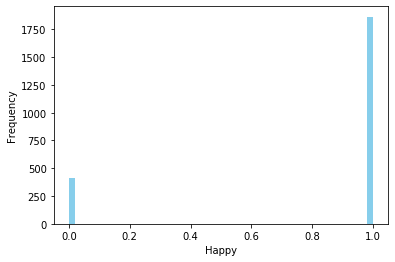

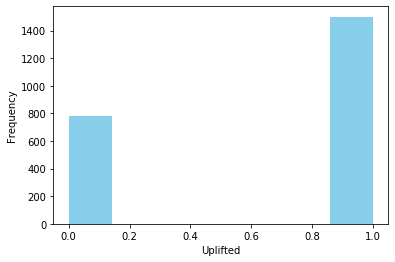

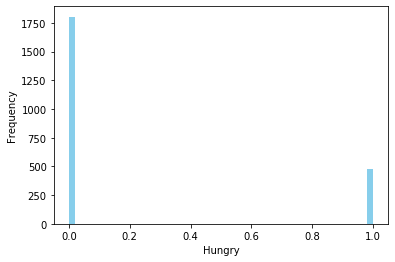

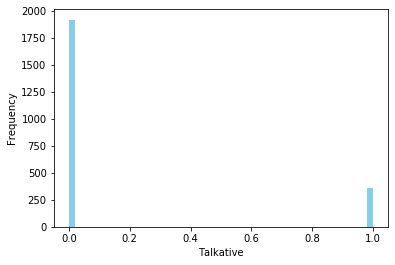

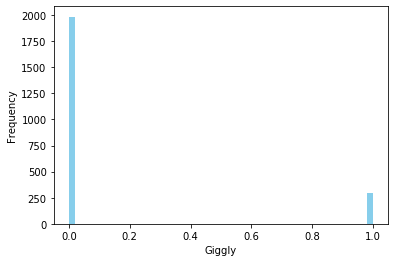

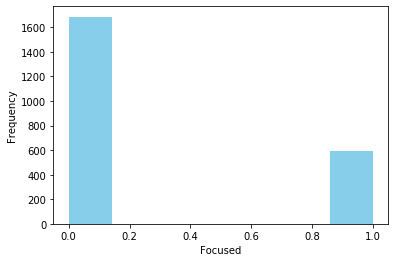

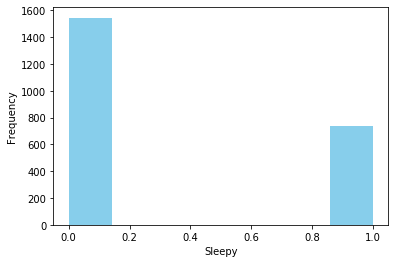

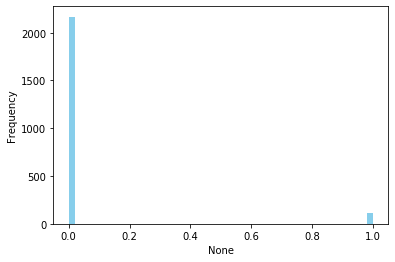

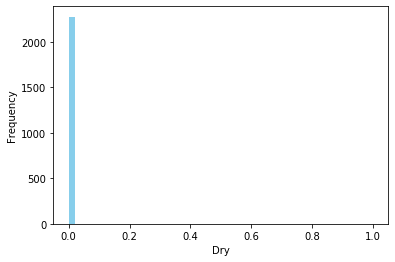

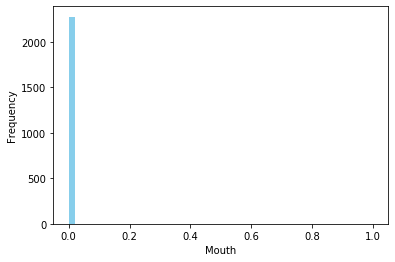

In [86]:
for effect in unique_effects_list:
    ax = sns.distplot(new_df[effect],
                     kde=False,
                     color="skyblue",
                     hist_kws={"linewidth": 15,'alpha':1})
    ax.set(xlabel=effect, ylabel='Frequency')
    plt.show()

Some raw stats first for each single sample